In [192]:
import sys
!{sys.executable} -m pip install google-api-python-client

In [193]:
import csv


In [194]:
import matplotlib.pyplot as plt


In [195]:

from googleapiclient.discovery import build


In [ ]:


api_key = 'hidden'    #API key hidden, should be replaced before running this file 

service = build('youtube', 'v3', developerKey=api_key)

nextPageToken = None

with open('quest2.csv', 'w', newline='', encoding='utf-8') as results:
    csvwrite = csv.writer(results)
    csvwrite.writerow(['Video ID', 'Title', 'Channel', 'Published At'])

    while True:
        request = service.search().list(
            q='AfD',
            part='snippet',
            type='video',
            maxResults=50,
            pageToken=nextPageToken,
            publishedAfter='2024-11-01T00:00:00Z',
            publishedBefore='2025-02-28T23:59:59Z'
        )
        response = request.execute()
        items = response.get('items', [])



        for each_item in items:
            video_id = each_item.get('id', {}).get('videoId')
            snippet = each_item.get('snippet', {})

            if not video_id:   # skip if no videoId
                continue

            video_id = each_item['id']['videoId']
            title = each_item['snippet']['title']
            channel = each_item['snippet']['channelTitle']
            published = each_item['snippet']['publishedAt']

            csvwrite.writerow([video_id, title, channel, published])

        nextPageToken = response.get('nextPageToken')
        if not nextPageToken:
            break

In [52]:
# importing pandas package
import pandas as pd

In [53]:
# assign dataset
csvData = pd.read_csv("quest2_d.csv")


In [54]:
                                       
# displaying unsorted data frame
print("\nBefore sorting:")
csvData



Before sorting:


,Video ID,Title,Channel,Published At
0,qeQwjrTyHmI,AfD lacht Jammer-Grüne aus! #afd #ltnrw,AfD-Fraktion NRW,2024-11-14T18:00:37Z
1,N7ttxZK_sZI,So steht die AfD zu Israel! #afd #ltnrw,AfD-Fraktion NRW,2024-11-12T18:00:15Z
2,mqlSpfMVA-U,Harald Schmidt: Beteilige mich nicht an AfD-Ba...,DACH Medien,2024-11-12T18:00:34Z
3,4DqH17qF0dg,Neuwahlen in Deutschland: Merz schließt Zusamm...,Tagesspiegel,2024-11-13T16:10:33Z
4,k8Ym2u1miyo,Ueli Maurers Meinung zur AfD &amp; Alice Weide...,Klartext Finanzen - RealUnit Schweiz AG,2024-11-15T14:00:50Z
...,...,...,...,...
1124,a0pqJXnbpcs,Academie Gent - Morph Mask - Hilda Raspoet - 2...,Patrick Baele,2025-02-18T16:56:54Z
1125,g7HSVb_UM8g,AFD WÄHLER FRAGEN OB SIE NAZIS SIND | Ketzer D...,Rolikz,2025-02-14T16:00:52Z
1126,7gk4pbzFGKQ,انتخابات ألمانيا .. من هو فريدريش ميرتس الذي س...,كشف المستور,2025-02-26T03:48:50Z
1127,ydIeR9Kt75g,Game over. #TVDuell #Scholz #Demos #Bohlen #Mo...,Berlin360°,2025-02-10T10:01:00Z


In [55]:

# Ensure 'Published At' is a datetime column
csvData['Published At'] = pd.to_datetime(csvData['Published At'])

# Sort by date (ascending = oldest first)
df_sorted = csvData.sort_values(by='Published At', ascending=True)

# Optional: reset the index
df_sorted = df_sorted.reset_index(drop=True)


In [56]:

df_sorted



,Video ID,Title,Channel,Published At
0,KtHmJfQv5f4,Rede von Oliver Kirchner: 👂🏻 Vollkommen realit...,Spiegel des Krieges,2024-11-01 11:00:32+00:00
1,WvkvsaodNwQ,👉😱👀 #afd #regierung #nachrichten #politik #deu...,Adlers Anstalt,2024-11-01 14:57:00+00:00
2,SJNfuFI_n4g,Alice Weidel - Gefährliche Meinungsfreiheit #...,Im Schatten der Politik,2024-11-01 15:00:27+00:00
3,Jc8HtBFyVoU,So zerstört man die AfD!,Volksverpetzer,2024-11-01 15:37:08+00:00
4,skYqiz616KA,Brandmauer für Islamisten! #afd #ltnrw,AfD-Fraktion NRW,2024-11-01 17:00:50+00:00
...,...,...,...,...
1124,4Itl7K6XdDI,Man sollte die Grünen aus dem Bundestag aussch...,DerSeggl88,2025-02-28 15:17:29+00:00
1125,MHg8zeS8gX4,Wie die AfD über Hitler streitet | heute-show ...,ZDF heute-show,2025-02-28 16:22:41+00:00
1126,DJZB5D6iPgc,❌ALICE WEIDEL REDET KLARTEXT ❌ #aliceweidel #a...,Rich Kids of Wall Street,2025-02-28 18:28:04+00:00
1127,Tqa6R6tQByk,"Nach der Wahl: Scholz tritt ab, Merz übernimmt...",ZDF heute-show,2025-02-28 21:30:06+00:00


In [57]:
# 1. Ensure 'Published At' is a datetime column
df_sorted['Published At'] = pd.to_datetime(df_sorted['Published At'])

# 2. Set 'Published At' as the index
df_sorted = df_sorted.set_index('Published At')

# 3. Group by month end
csvDataByWeek = df_sorted.groupby(pd.Grouper(freq='W-MON')).count()  # sum or count depending on your use case

csvDataByWeek

,Video ID,Title,Channel
Published At,,,
2024-11-04 00:00:00+00:00,23,23,23
2024-11-11 00:00:00+00:00,36,36,36
2024-11-18 00:00:00+00:00,52,52,52
2024-11-25 00:00:00+00:00,50,50,50
2024-12-02 00:00:00+00:00,24,24,24
2024-12-09 00:00:00+00:00,20,20,20
2024-12-16 00:00:00+00:00,30,30,30
2024-12-23 00:00:00+00:00,40,40,40
2024-12-30 00:00:00+00:00,24,24,24


In [58]:
csvDataByDay = df_sorted.groupby(pd.Grouper(freq='D')).count()  # sum or count depending on your use case

csvDataByDay

,Video ID,Title,Channel
Published At,,,
2024-11-01 00:00:00+00:00,7,7,7
2024-11-02 00:00:00+00:00,3,3,3
2024-11-03 00:00:00+00:00,9,9,9
2024-11-04 00:00:00+00:00,4,4,4
2024-11-05 00:00:00+00:00,1,1,1
...,...,...,...
2025-02-24 00:00:00+00:00,24,24,24
2025-02-25 00:00:00+00:00,13,13,13
2025-02-26 00:00:00+00:00,9,9,9


In [59]:
csv2 = csvDataByWeek.drop(labels=None, axis=0, index=None, columns={'Video ID','Channel'}, level=None, inplace=False, errors='raise')
csv3 = csv2.rename(columns={'Title': 'Number of Videos'})
csv3


,Number of Videos
Published At,
2024-11-04 00:00:00+00:00,23
2024-11-11 00:00:00+00:00,36
2024-11-18 00:00:00+00:00,52
2024-11-25 00:00:00+00:00,50
2024-12-02 00:00:00+00:00,24
2024-12-09 00:00:00+00:00,20
2024-12-16 00:00:00+00:00,30
2024-12-23 00:00:00+00:00,40
2024-12-30 00:00:00+00:00,24


In [60]:

csv4 = csvDataByDay.drop(labels=None, axis=0, index=None, columns={'Video ID','Channel'}, level=None, inplace=False, errors='raise')
csv5 = csv4.rename(columns={'Title': 'Number of Videos'})
csv5

,Number of Videos
Published At,
2024-11-01 00:00:00+00:00,7
2024-11-02 00:00:00+00:00,3
2024-11-03 00:00:00+00:00,9
2024-11-04 00:00:00+00:00,4
2024-11-05 00:00:00+00:00,1
...,...
2025-02-24 00:00:00+00:00,24
2025-02-25 00:00:00+00:00,13
2025-02-26 00:00:00+00:00,9


In [63]:
csv5.to_csv('quest2_yt_daily.csv')

<Axes: title={'center': 'Weekly number of videos uploaded'}, xlabel='Published At'>

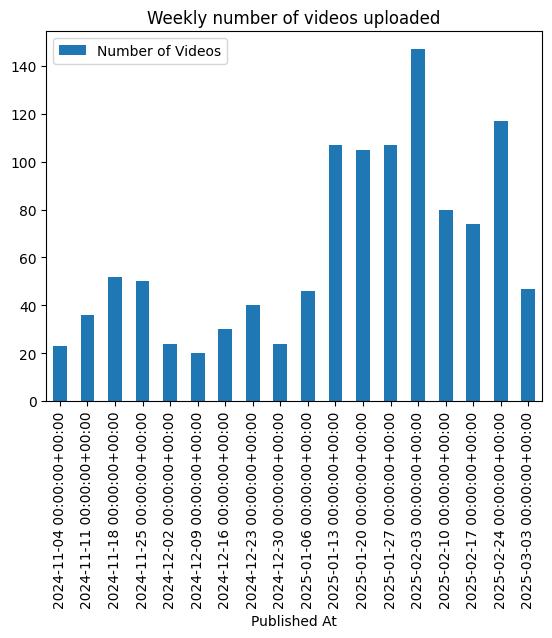

In [64]:
plot = csv3.plot(title='Weekly number of videos uploaded', kind= 'bar')
plot

<Axes: title={'center': 'Weekly number of videos uploaded'}, xlabel='Published At'>

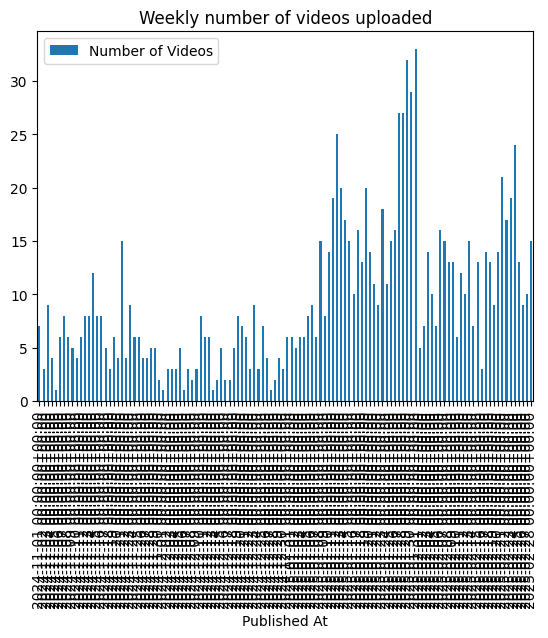

In [65]:
plot2 = csv5.plot(title='Weekly number of videos uploaded', kind= 'bar')
plot2